# Visualizing the Spherical harmonics

## Setup

In [1]:
import math
import numpy as np
import torch

from torch_harmonics.quadrature import legendre_gauss_weights
from torch_harmonics.legendre import legpoly, clm
from torch_harmonics import RealSHT, InverseRealSHT

## Forming the Vandermonde matrix

In [2]:
nlat = 60
nlon = 2*nlat
lmax = mmax = nlat

sht = RealSHT(nlat, nlon, lmax=lmax, mmax=mmax)
isht = InverseRealSHT(nlat, nlon, lmax=lmax, mmax=mmax)

In [3]:
# forming the Vandermonde matrix

nmodes = int(lmax * lmax)
e = torch.zeros(nmodes, lmax, mmax, dtype=torch.complex64)

midx = lambda l,m : l*(l+1) + m

for l in range(lmax):
    for m in range(-l, l+1):
        e[midx(l,m), l, abs(m)] = 1.0 if m >= 0 else 1.0j

vdm = isht(e)

In [4]:
abs(-2)

2

In [5]:
midx(1,-1)

1

In [6]:
e[1,1,0]

tensor(0.+0.j)

## Plotting the Spherical Harmonics

In [7]:
import matplotlib.pyplot as plt
from torch_harmonics.plotting import plot_sphere

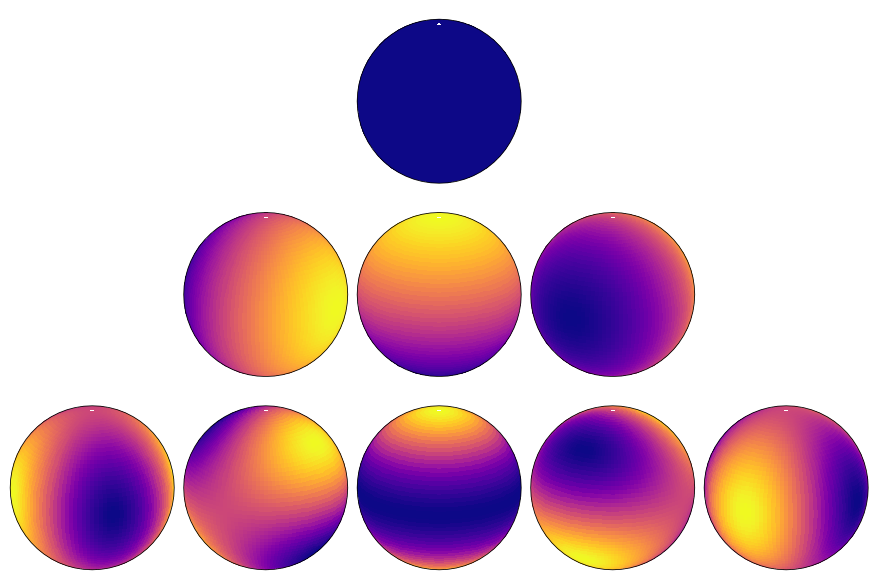

In [ ]:
plt_lmax = 3

fig = plt.figure(layout='constrained', figsize=(12, 8))
subfigs = fig.subfigures(plt_lmax, 2*plt_lmax-1)

for l in range(plt_lmax):
    for m in range(-l, l+1):
        plot_sphere(vdm[midx(l,m)], fig=subfigs[l, m+plt_lmax-1], projection="orthographic", title=f"l={l}, m={m}", central_latitude=20, central_longitude=30, cmap="plasma")

plt.savefig("spherical_harmonics.png")

let's also make an animated version:

In [9]:
# import matplotlib.animation as animation

# fig = plt.figure(layout='constrained', figsize=(12, 8), dpi=72)
# subfigs = fig.subfigures(plt_lmax, plt_lmax)

# moviewriter = animation.writers['pillow'](fps=30)
# moviewriter.setup(fig, 'spherical_harmonics.gif', dpi=72)

In [10]:
# for frame in range(120):
#     # compute the rotation of the sphere
#     lon = -120 - 3 * frame

#     if frame % 10 == 0:
#         print(f"frame={frame}")

#     for l in range(plt_lmax):
#         for m in range(l+1):
#             plot_sphere(vdm[midx(l,m)], fig=subfigs[l, m], projection="orthographic", title=f"l={l}, m={m}", central_longitude=lon)

#     plt.draw()
#     moviewriter.grab_frame()

# moviewriter.finish()